In [2]:
#For this clustering project, I will attempt to complete option 1, 2, and 4.

#I plan to: 

#Complete the exercise (Option 2)
#Complete Option 1
#Complete option four by generating my own random data

In [3]:
#I completed the exercise and the link to the github repo is below: 

#https://github.com/jontord/CS320/blob/master/Clustering/ClusteringIris.ipynb

#I made my own edits to this project and tested the wine dataset, a different dataset provided by sklearn. Although
#this may seem to be a version of the fourth option which is of advanced difficulty, I'll be creating a separate 
#project in the future which also does this as well. 

#I created several functions which attempt to "optimize" the DBSCAN algorithm and plot the figures

In [4]:
#Option 1: Visualizing K-Means and DBSCAN

#After working with the visualizations for several minutes, it became clear which ones were more advantageous to 
#use in certain scenarios. Hyperparameters significantly affect this selection process between the two algorithms, 
#and often times the decision is quite obvious. For example, if it is clear to the programmer that there are a large
#collection of clusters distributed throughout a plane, then it would be naive to use the K-means clustering algorithm. 
#This is because K-means relies on the placement of centroids throughout a plane, and if there are countless datapoints
#evenly dispersed, it would be advantageous to use the alternative method of DBSCAN. DBSCAN is useful because it allows
#the programmer to set the hyperparameters for "epsilon" or the distance the algorithm extends beyond a point to form
#a cluster with other nearby points. DBSCAN also allows the programmer to set the minimum amount of points that must
#be contained within the epsilon distance. Although DBSCAN is useful for these cases, it requires the programmer to 
#set two hyperparameters, while K-means only involves one. If the user wants to run these algorithms unsupervised, 
#there will need to be a considerable amount of validation involved with the DBSCAN method as there are many more 
#permutations of possible hyperparameters that will impact the end result. However, when supervised, the DBSCAN method
#is far more effective than K-means. For example, when given a picture of a "smiley face," DBSCAN parses through each
#and every datapoint on the plane, slowly creating separate clusters which slowly grow in size. If this is done after
#settting reasonable hyperparameters (meaning setting hyperparameters which should generally not be impossible, such
#avoiding the use of a minisclue epsilon and an excessive amount of minimum points per cluster), DBSCAN will almost 
#always correctly cluster in an efficient and reliable manner. However, if K-means is used, it is highly unlikely and 
#virtually impossible that it will cluster the datapoints correctly. Because K-means relies on taking the distance 
#between each datapoint after setting centroids, and the "expression" of the smiley face is contained within a circular
#cluster, it is impossible to correctly group the datapoints in their separate clusters with any configuration of 
#centroids, regardless of whether or not this hyperparameter is randomly generated or decided by the programmer. 

#...K-means may also involve setting two hyperparameters: The amount of centroids and where the centroids are. 

In [5]:
#Now I will attempt to implement the K-means algorithm myself. I'll be using the video below as a reference as well as
#the provided CS320 notes. 

#How K-Means clustering works: 

#Set the hyperparameter of the number of centroids/generated points/k
#Choose where the centroids are or have them randomly generated. 
#Iterate through each point and assign them to the closest centroid (distance formula) 
#Each centroid and their assigned points represents a cluster, so calculate the mean of each cluster
#That mean point represents the "new centroid," and the process of assigning points repeats
#The process of assigning points repeats until the position of the centoids remains constant

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'Points')

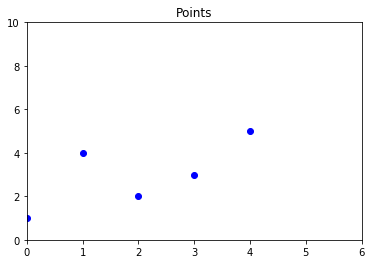

In [7]:
#Test plot
plt.plot([0, 1, 2, 3, 4], [1, 4, 2, 3, 5], 'bo')
plt.axis([0, 6, 0, 10])
plt.title("Points")

In [8]:
import random as rd

In [19]:
#Program blob generator

def genXVals(n_points, Xmin, Xmax):
    xVals = []
    for x in range(n_points):
        xVals.append(rd.randint(Xmin, Xmax))
    return xVals

def genYVals(n_points, Ymin, Ymax): 
    yVals = []
    for y in range(n_points):
        yVals.append(rd.randint(Ymin, Ymax))
    return yVals
        
        

X value: [10, -2, 3, -5, 6, -4, -8, -1, 2, -10, 7, -3, 9, -8, 7, 3, 8, 2, 3, -4]
Y value: [-3, 3, 6, -2, 7, -7, 6, -10, -6, 4, 2, 0, 7, 3, 5, -7, 7, 5, 1, 9]
X value: [-14, -16, -16, -27, -25, -12, -13, -13, -20, -28, -15, -27, -16, -10, -21, -19, -17, -13, -28, -30, -11, -23, -19, -13]
Y value: [34, 64, 64, 50, 32, 52, 53, 68, 43, 53, 68, 55, 39, 50, 42, 45, 61, 53, 52, 66, 46, 68, 69, 69]
X value: [7, 9, 9, 0, 2, 3, 8, 1, 7, 3, 7, 0, 4, 4, 9, 2, 8, 10]
Y value: [60, 56, 69, 55, 72, 85, 76, 69, 63, 72, 79, 76, 72, 62, 56, 66, 73, 72]


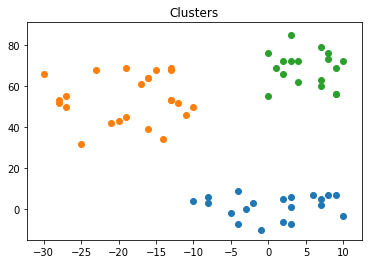

In [50]:
def plot_cluster(n_point, Xmin, Xmax, Ymin, Ymax):  
    x = genXVals(n_point, Xmin, Xmax)
    y = genYVals(n_point, Ymin, Ymax)
    plt.scatter(x, y)
    print("X value: {}".format(x))
    print("Y value: {}".format(y))

plot_cluster(20, -10, 10, -10, 10)
plot_cluster(24, -30, -10, 30, 70)
plot_cluster(18, 0, 10, 55, 85)
plt.title("Clusters")
plt.show()

In [54]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 

In [72]:
x1 = [10, -2, 3, -5, 6, -4, -8, -1, 2, -10, 7, -3, 9, -8, 7, 3, 8, 2, 3, -4]
x2 = [-14, -16, -16, -27, -25, -12, -13, -13, -20, -28, -15, -27, -16, -10, -21, -19, -17, -13, -28, -30, -11, -23, -19, -13]
x3 = [7, 9, 9, 0, 2, 3, 8, 1, 7, 3, 7, 0, 4, 4, 9, 2, 8, 10]
xVal = x1 + x2 + x3

y1 = [-3, 3, 6, -2, 7, -7, 6, -10, -6, 4, 2, 0, 7, 3, 5, -7, 7, 5, 1, 9]
y2 = [34, 64, 64, 50, 32, 52, 53, 68, 43, 53, 68, 55, 39, 50, 42, 45, 61, 53, 52, 66, 46, 68, 69, 69]
y3 = [60, 56, 69, 55, 72, 85, 76, 69, 63, 72, 79, 76, 72, 62, 56, 66, 73, 72]
yVal = y1 + y2 + y3

data = {"X": xVal, "Y": yVal}
df = pd.DataFrame(data)
df.head(n = 3)

,X,Y
0,10,-3
1,-2,3
2,3,6


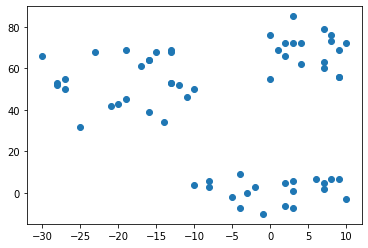

In [78]:
plt.scatter(xVal, yVal)
plt.show()
#Unclassified points on the plane